# 1. 데이터 로드

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np

train = pd.read_csv( 'data/train.csv' )
test = pd.read_csv( 'data/test.csv' )

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
train.shape

(891, 12)

In [4]:
test.shape

(418, 11)

In [5]:
# 데이터 타입 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
# empty 데이터 확인
train.isnull().sum() # 대부분 정보가 잘 들어가 있다.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# 2. Feature Engineering
## 2.1 데이터 조사

|Variable|Definition|Key|
|:-|:-|:-|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex| |
|Age|Age in years| |
|sibsp|# of siblings / spouses aboard the Titanic| |
|parch|# of parents / children aboard the Titanic| |
|ticket|Ticket number| |
|fare|Passenger fare| |
|cabin|Cabin number| |
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|
<center><b>[컬럼에 대한 설명]</b></center>



In [9]:
sns.set()

In [10]:
# feature 별 생존율을 확인할 수 있는 차트를 함수로 선언한다.
def bar_chart( df, feature ) :
    survived = df[df['Survived']==1][feature].value_counts()
    dead = df[df['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))
    
def pie_chart( df, feature ) :
    survived = len( df[df['Survived']==1] ) / len( df ) * 100
    dead = len( df[df['Survived']==0] ) / len( df ) * 100
    
    title = '{} of featue({})'.format( df[feature].unique()[0], feature )
    
    plt.title( title )    
    plt.pie( [survived, dead], labels=['Survived', 'dead'], colors=['green', 'red'], autopct='%0.1f%%' )
    plt.axis('equal')    
    plt.show()
    


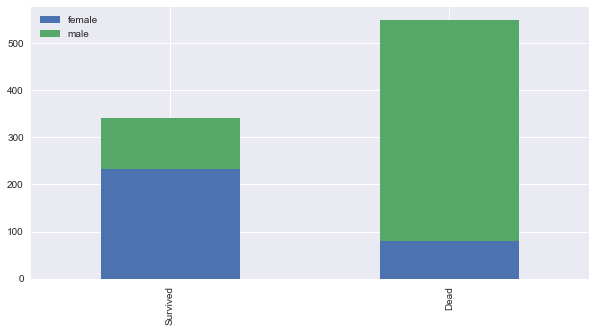

In [11]:
# 성별 생존율
bar_chart( train, 'Sex') # 여성이 남성보다 많이 살았다. (피처로 채택 예정)

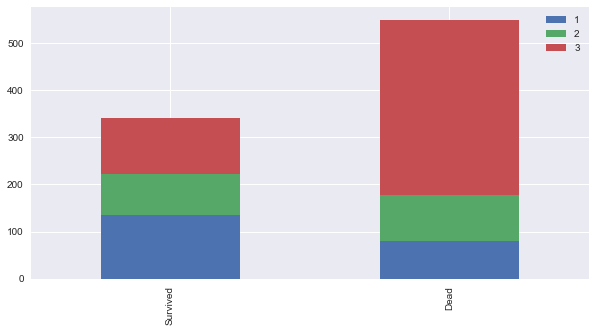

In [12]:
# Pclass(티켓 혹은 승선 등급) 에 따라 생존율이 차이나는 것을 확인할 수 있다. (피처로 채택 예정)
bar_chart( train, 'Pclass')

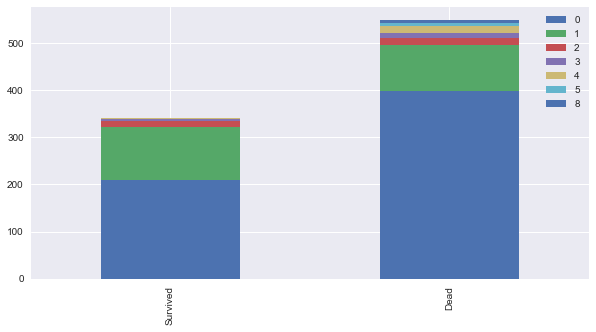

In [13]:
# 형제 또는 자매와 같이 탑승한 경우의 수
bar_chart( train, 'SibSp') # 아직까지 뚜렷한 차이점을 느끼지 못하므로 세부 체크를 해봐야 할 것 같다.

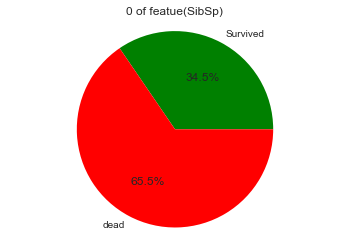

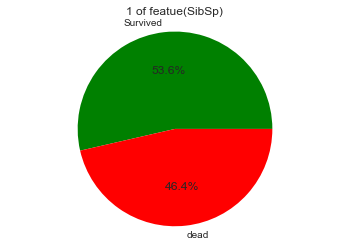

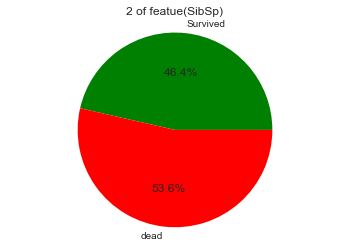

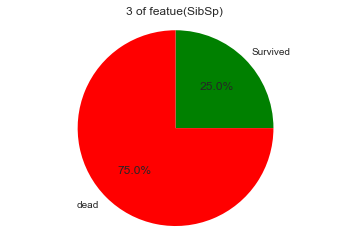

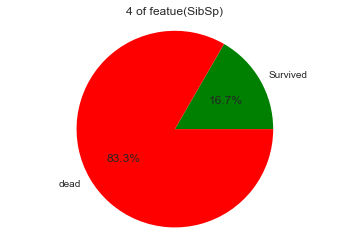

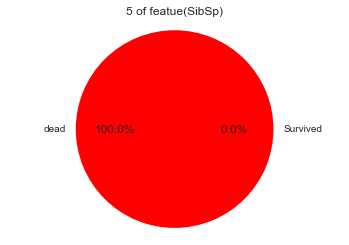

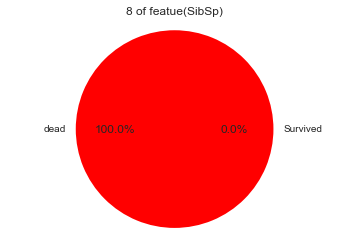

In [14]:
# SibSp 값을 그룹으로 묶어 각각의 값 별로 생존율을 확인해보면
for SibSp, group in train.groupby( 'SibSp' ) :
    pie_chart( group, 'SibSp' )
    
# 1과 2에서 가장 높은 생존율을 보이며 그 외의 값에선 생존율이 조금씩 떨어지는 것을 볼 수 있다.
# 피처로 사용할 수 있는 값이라고 판단된다.

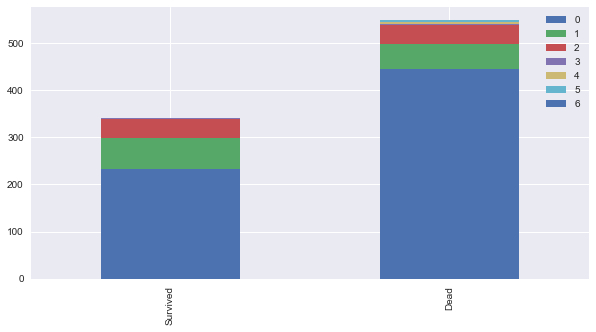

In [15]:
# 부모님과 함께 탑승한 자녀의 생존률 조사
bar_chart( train, 'Parch' )

# 역시 바 차트 만으론 확인하기 힘들다. 각각 항목별 생존율을 파이차트로 다시 확인해본다.

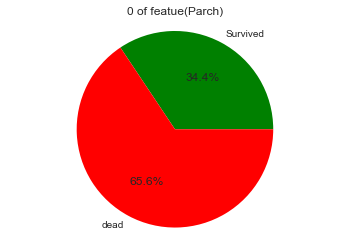

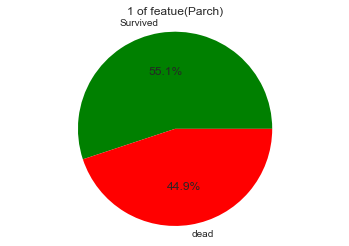

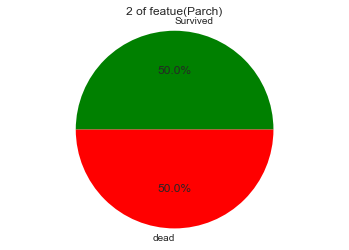

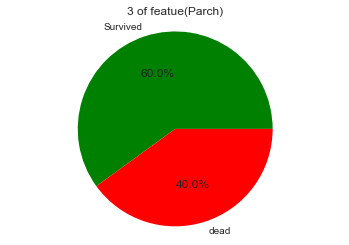

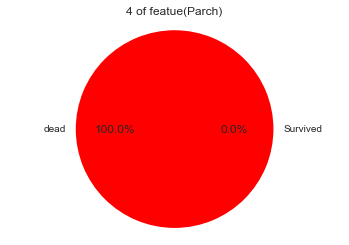

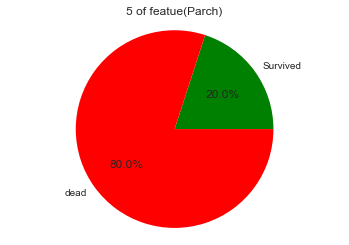

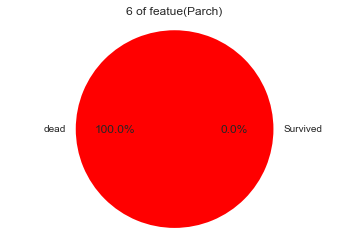

In [16]:
# SibSp 값을 그룹으로 묶어 각각의 값 별로 생존율을 확인해보면
for Parch, group in train.groupby( 'Parch' ) :
    pie_chart( group, 'Parch' )

# 1, 2, 3일때 생존율이 제일 좋다. (부모님과 함께한 아이들의 생존율이 좋다고 볼 수 있다.)
# 피쳐로 선택할만 하다.

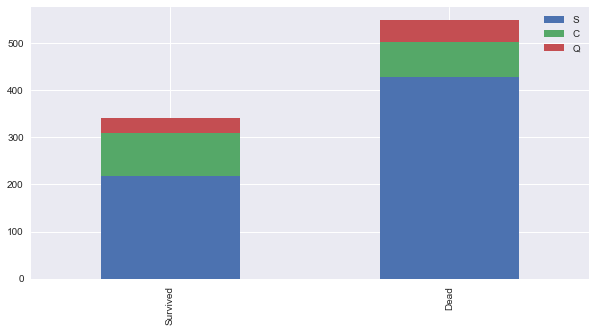

In [17]:
# embarked (승선지) 별 생존율 확인
bar_chart( train, 'Embarked' )
# 얼핏 봐선 비슷해 보이므로 개별 조사를 해본다.

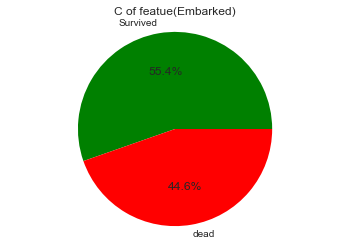

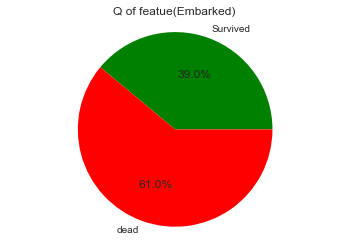

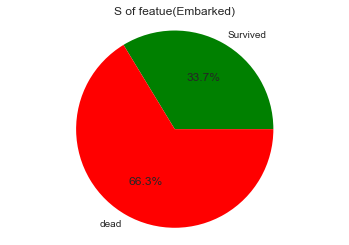

In [18]:
# SibSp 값을 그룹으로 묶어 각각의 값 별로 생존율을 확인해보면
for Embarked, group in train.groupby( 'Embarked' ) :
    pie_chart( group, 'Embarked' )
    
# C 승선지에서 탄 사람들이 Q, S 에 탄 사람들보다 비교적 많이 살아남은 것을 확인할 수 있다.
# 피처로 채택한다.

In [19]:
# Fare(요금) 항목에 대한 조사
print( 'len:{}'.format( len( train['Fare'].unique() ) ) )
print( 'min:{} max:{} mean:{}'.format( train['Fare'].min(), train['Fare'].max(), train['Fare'].mean() ) ) 
train['Fare'].unique()
# 248개의 항목이 존재한다. (개수가 너무 많아 다운사이징이 필요하다.)

len:248
min:0.0 max:512.3292 mean:32.2042079685746


array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [20]:
# Pclass 별로 요금내역을 확인해보자
for Pclass, group in train.groupby('Pclass') :
    print( 'Pclass:{} len:{}, min:{}, max:{}, mean:{}'.format( Pclass, len(group), group['Fare'].min(), group['Fare'].max(), group['Fare'].mean() ) )

    
# 모든 등급에도 무료로 승성한 사람이 존재한다. (아이들은 무료인가?)

Pclass:1 len:216, min:0.0, max:512.3292, mean:84.15468749999992
Pclass:2 len:184, min:0.0, max:73.5, mean:20.66218315217391
Pclass:3 len:491, min:0.0, max:69.55, mean:13.675550101832997


In [21]:
train[train['Fare'] == 0]
# 딱히 나이와 연관된 것도 아닌것 같다. (아마도 누락된 값이 아닐까 의심된다.)
# 'Fare' 가 0인 사람들은 Pclass 별로 Fare 값을 평균으로 계산해 값을 채워주도록 해보자 (Feature 수정 예정)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [22]:
# 운임요금이 0인 값은 누락이라 판단되므로 0이 아닌 값을 Pclass 로 평균을 내본다.
# 이 계산은 추후 Engineering 시점에 Feature 수정을 한번에 진행하도록 한다.
for Pclass, group in train.groupby('Pclass') :
    print( 'Pclass:{} len:{}, mean:{}'.format( Pclass, len(group), group[group['Fare'] != 0.0]['Fare'].mean() ) )
    
# 추가로 Fare 의 Unique 값이 너무 많으므로 일정 구역을 정해 값을 변경하도록 한다.

Pclass:1 len:216, mean:86.14887440758287
Pclass:2 len:184, mean:21.358661235955054
Pclass:3 len:491, mean:13.787874948665301


In [23]:
# 나이에 대한 고민 (empty 데이터가 177개나 존재한다.)
print( 'empty:{}'.format( train['Age'].isnull().sum() ) )

train['Age'].unique()

# 나이대를 다운사이징(카테고라이징)할지 나중에 고민해보도록 한다.

empty:177


array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

## 2.2 데이터 수정

### 2.2.1 Name 항목 수정

In [27]:
# 이름에서 중요 지표 뽑아보기
print( len(train['Name']) )
train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# 다행히 모든 이름이 Title( Mr, Miss, Mrs 등)을 소유한 것 같다.

891


0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
5          Mr
6          Mr
7      Master
8         Mrs
9         Mrs
10       Miss
11       Miss
12         Mr
13         Mr
14       Miss
15        Mrs
16     Master
17         Mr
18        Mrs
19        Mrs
20         Mr
21         Mr
22       Miss
23         Mr
24       Miss
25        Mrs
26         Mr
27         Mr
28       Miss
29         Mr
        ...  
861        Mr
862       Mrs
863      Miss
864        Mr
865       Mrs
866      Miss
867        Mr
868        Mr
869    Master
870        Mr
871       Mrs
872        Mr
873        Mr
874       Mrs
875      Miss
876        Mr
877        Mr
878        Mr
879       Mrs
880       Mrs
881        Mr
882      Miss
883        Mr
884        Mr
885       Mrs
886       Rev
887      Miss
888      Miss
889        Mr
890        Mr
Name: Name, Length: 891, dtype: object

In [28]:
# 타이틀 컬럼을 새로 만들어본다.
list_train_test = [train, test]

for dataset in list_train_test :
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

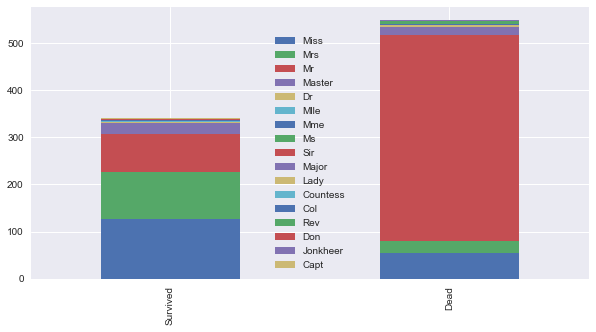

In [29]:
# 타이틀별 생존율을 확인해보자
bar_chart( train, 'Title' )

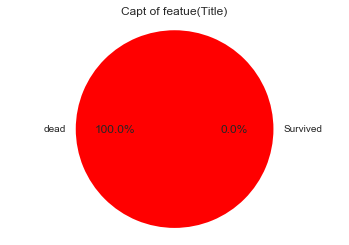

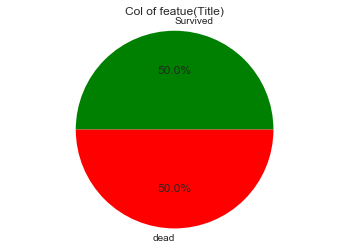

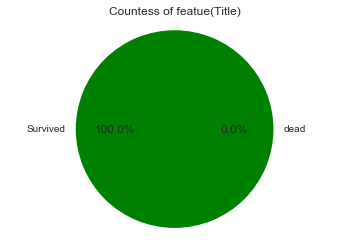

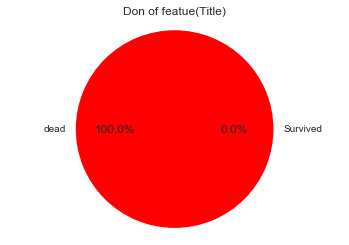

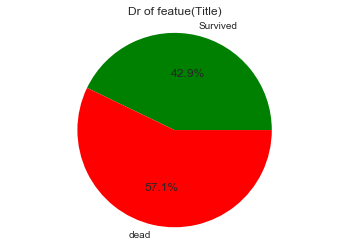

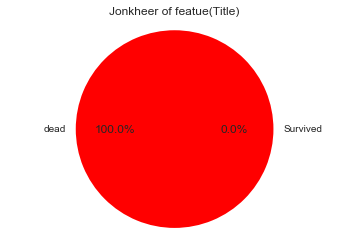

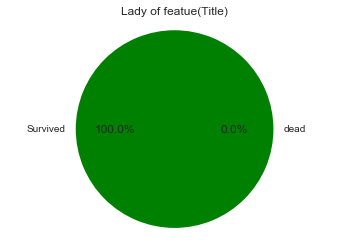

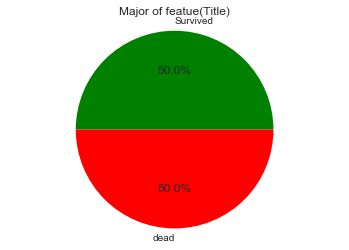

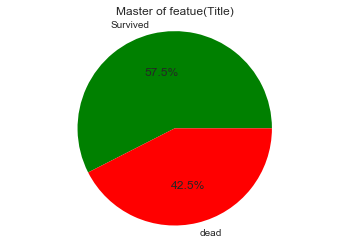

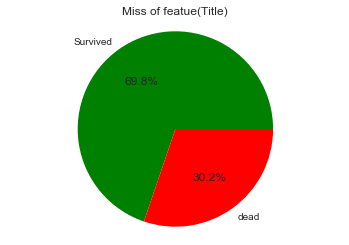

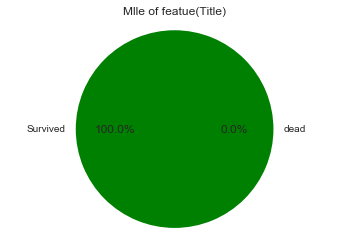

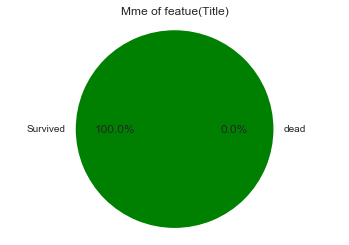

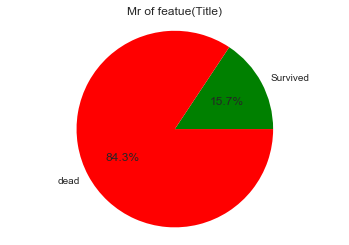

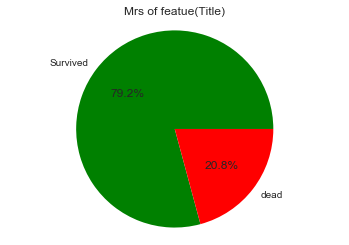

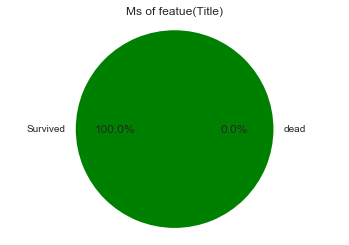

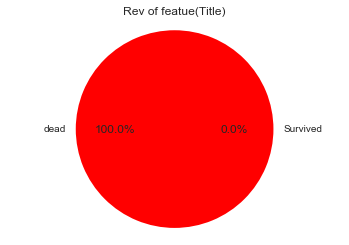

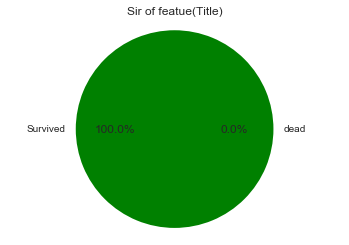

In [30]:
# pie chart
for Title, group in train.groupby('Title') :
    pie_chart( group, 'Title' )

In [31]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Countess      1
Don           1
Ms            1
Sir           1
Lady          1
Jonkheer      1
Capt          1
Mme           1
Name: Title, dtype: int64

In [32]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

In [33]:
# 편입이 가능한 값을 편입시켜본다.
# Ms -> Miss
# Mme -> Mrs
# Mlle -> Miss
list_title = np.array( train['Title'].unique() )

# Mr, Miss, Mrs, Master 를 제외한 Title 을 ETC 로 전환한다.
list_title = np.delete( list_title, [
    np.where( list_title == 'Mr' ),
    np.where( list_title == 'Miss' ),
    np.where( list_title == 'Mrs' ),
    np.where( list_title == 'Master' )
])

#list_title = np.delete( train['Title'].unique(), ['Mr', 'Miss', 'Mrs', 'Master'] )

#list_title

for dataset in list_train_test :
    dataset['Title'] = dataset['Title'].replace( 'Mme', 'Mrs' )
    dataset['Title'] = dataset['Title'].replace( ['Ms', 'Mlle'], 'Miss' )
    dataset['Title'] = dataset['Title'].replace( list_title, 'ETC' )
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


In [34]:
# 잘 합산됐는지 확인
train['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
ETC        23
Name: Title, dtype: int64

In [35]:
# Name 컬럼을 Drop 한다.
train = train.drop('Name', axis=1)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


### 2.2.2 Age 항목 빈자리 채우기

In [36]:
# 총 177개의 빈자리가 존재한다.
train['Age'].isnull().sum()

177

In [37]:
# Title 별 평균을 사용해 NaN 을 매꿔준다.
for Title in train['Title'].unique() :
    # title 별로 notnull 인 값의 평균을 구해 null 인 데이터를 매꿔준다.
    train.loc[train[(train['Title'] == Title) & (train['Age'].isnull())].index, 'Age' ] = train[(train['Title'] == Title) & (train['Age'].notnull())]['Age'].mean()

In [38]:
# Carbin 과 Embarked 를 제외하고 Empty 데이터가 사라졌다.
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

### 2.2.3 Embarked 빈자리 채우기

In [39]:
train[train['Embarked'].isnull()]
# SibSp 도 없고 Parch 도 없기 때문에 형제나 가족 없이 단독 탑승이다.

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1,1,female,62.0,0,0,113572,80.0,B28,NaN,Mrs


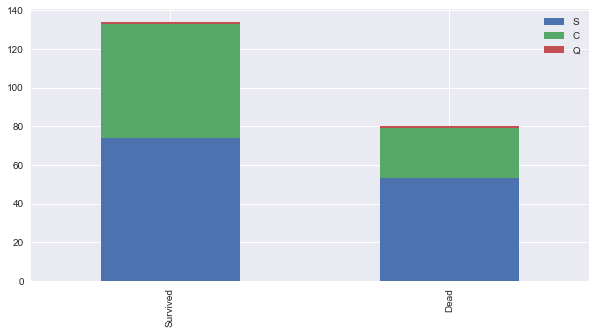

In [40]:
# 두명이 탑승지 정보가 없고 모두 살아남았으며 모두 1등급 객실에 탑승했다.
# 1등급 객실을 이용한 사람들의 Embarked 정보를 확인해보자
bar_chart( train[train['Pclass']==1], 'Embarked' )

In [41]:
train[train['Pclass']==1]['Embarked'].value_counts()

S    127
C     85
Q      2
Name: Embarked, dtype: int64

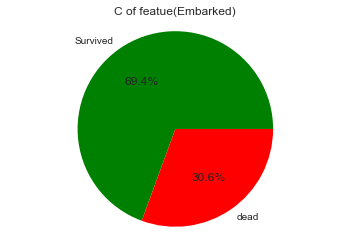

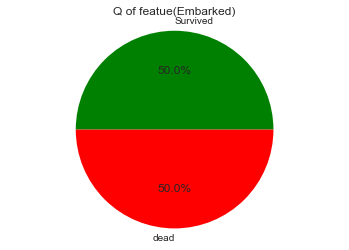

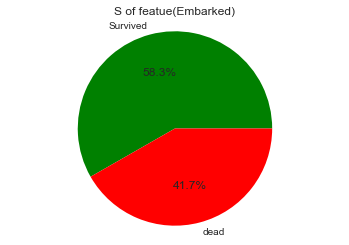

In [42]:
for Embarked, group in train[train['Pclass']==1].groupby( 'Embarked' ) :
    pie_chart( group, 'Embarked' )

In [43]:
# 인근한 승객번호별로 비슷한 탑승지를 유지하는지 확인해본다.
train[(train['PassengerId'] >= 50) & (train['PassengerId'] <= 70)]

# 비슷한 탑승지를 보유하진 않았다.

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
49,50,0,3,female,18.000000,1,0,349237,17.8000,NaN,S,Mrs
50,51,0,3,male,7.000000,4,1,3101295,39.6875,NaN,S,Master
51,52,0,3,male,21.000000,0,0,A/4. 39886,7.8000,NaN,S,Mr
52,53,1,1,female,49.000000,1,0,PC 17572,76.7292,D33,C,Mrs
53,54,1,2,female,29.000000,1,0,2926,26.0000,NaN,S,Mrs
54,55,0,1,male,65.000000,0,1,113509,61.9792,B30,C,Mr
55,56,1,1,male,32.368090,0,0,19947,35.5000,C52,S,Mr
56,57,1,2,female,21.000000,0,0,C.A. 31026,10.5000,NaN,S,Miss
57,58,0,3,male,28.500000,0,0,2697,7.2292,NaN,C,Mr
58,59,1,2,female,5.000000,1,2,C.A. 34651,27.7500,NaN,S,Miss


In [44]:
# 1등급 선실을 사용한 사람중
#    탑승자 숫자 순서 : S C Q
#    생존율은 C S Q
# 한명은 S 에 한명은 C 로 변환한다.

train.loc[61,'Embarked'] = 'S'
train.loc[829,'Embarked'] = 'C'

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

### 2.2.4 Feature 로 선택하지 않을 컬럼 제거

1. PassengerId 는 단순히 분류를 위한 값이기 때문에 생존율에 영향을 주지 않는다. -> Drop
2. Carbin 은 수화물 정보이며 생존에 영향을 주지 않는다고 판단된다. -> Drop
3. Ticket 은 Ticket ID 이므로 생존에 영향을 주지 앟는다고 판단된다. -> Drop

In [45]:
train = train.drop( ['PassengerId', 'Cabin', 'Ticket'], axis=1)

train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


### 2.2.5 문자열 데이터 숫자로 변환
1. Sex 와 Title 항목을 숫자값으로 변환한다.

In [53]:
# 문자열을 숫자로 변환하는 클래스 (단순 순차 변환 지원)
class value_changer :
    def __init__( self, df, column_name ) :
        self.__column_name = column_name
        self.__dic_data = {}
        self.__df = df
    
    def change_each( self, row ) :
        if row[self.__column_name] in self.__dic_data :
            return self.__dic_data[row[self.__column_name]]
        
    def change_str_to_int( self ) :
        list_data = self.__df[self.__column_name].unique()        
        self.__dic_data = { list_data[idx] : idx for idx in range( 0, len(list_data) ) }
        
        print( self.__dic_data )
        
        self.__df[self.__column_name] = self.__df.apply( self.change_each, axis=1 )

In [55]:
vc = value_changer( train, 'Sex' )

vc.change_str_to_int()

train.head(5)

{0: 0, 1: 1}


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,Mr
1,1,1,1,38.0,1,0,71.2833,C,Mrs
2,1,3,1,26.0,0,0,7.9250,S,Miss
3,1,1,1,35.0,1,0,53.1000,S,Mrs
4,0,3,0,35.0,0,0,8.0500,S,Mr


In [56]:
vc = value_changer( train, 'Title' )
vc.change_str_to_int()
train.head(5)

{'Mr': 0, 'Mrs': 1, 'Miss': 2, 'Master': 3, 'ETC': 4}


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,0
1,1,1,1,38.0,1,0,71.2833,C,1
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,1
4,0,3,0,35.0,0,0,8.0500,S,0


### 2.2.5 Linear 한 값을 일정 수치로 카테고라이즈 한다.
1. Age는 생존에 중요한 지표가 되지만 너무 Linear 하다. (특정 구간을 이용해 카테고라이즈해본다.)
2. Fare 역시 생존에 중요한 지표가 되지만 Linear 하다.

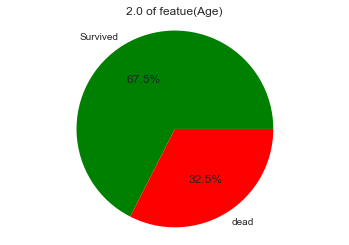

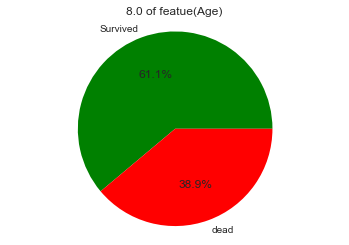

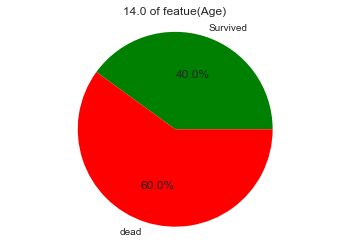

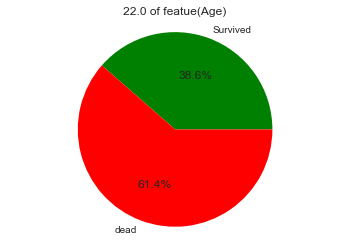

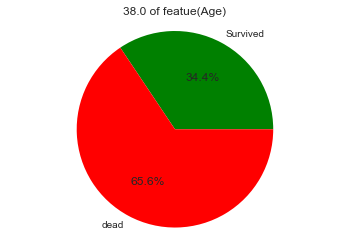

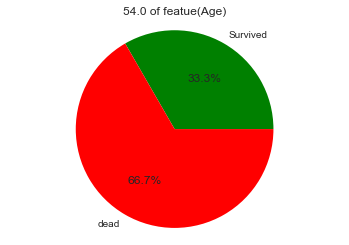

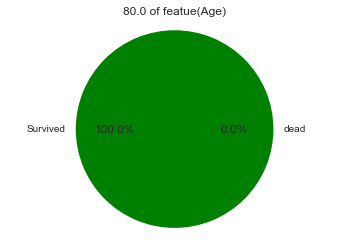

In [59]:
# 나이를 다음과 같은 기준으로 다시 나눠보도록 한다.
# 0 <= age <= 4 : Baby
# 4 < age <= 8 : Kid
# 8 < age <= 18 : Child
# 18 < age <= 30 : young adult
# 30 < age <= 50 : adult
# 50 < age <= 75 : mid age
# 75 < age : prime of life

train['age_grade'] = train['Age']

pie_chart( train[(train['Age'] >= 0) & (train['Age']<= 4)], 'Age' )
pie_chart( train[(train['Age'] > 4 ) & (train['Age']<= 8)], 'Age' )
pie_chart( train[(train['Age'] > 8 ) & (train['Age']<= 18)], 'Age' )
pie_chart( train[(train['Age'] > 18 ) & (train['Age']<= 30)], 'Age' )
pie_chart( train[(train['Age'] > 30 ) & (train['Age']<= 50)], 'Age' )
pie_chart( train[(train['Age'] > 50 ) & (train['Age']<= 75)], 'Age' )
pie_chart( train[(train['Age'] > 75 ) & (train['Age']<= 200)], 'Age' )

In [60]:
# 나이대별 생존율을 보고 생존율이 높은 순서대로 grade 를 지정하도록 한다.
train['age_grade'] = train['Age']

def mapping_age( df ) :
    Age = df['Age']
    age_grade = Age
    if Age <= 4 :
        age_grade = 1
    elif Age <= 8 :
        age_grade = 2
    elif Age <= 18 :
        age_grade = 4
    elif Age <= 30 :
        age_grade = 5
    elif Age <= 50 :
        age_grade = 3
    elif Age <= 75 :
        age_grade = 6
    elif Age > 75 :
        age_grade = 0
        
    return age_grade
    
train['age_grade'] = train.apply( mapping_age, axis=1 )

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,age_grade
0,0,3,0,22.0,1,0,7.2500,S,0,5
1,1,1,1,38.0,1,0,71.2833,C,1,3
2,1,3,1,26.0,0,0,7.9250,S,2,5
3,1,1,1,35.0,1,0,53.1000,S,1,3
4,0,3,0,35.0,0,0,8.0500,S,0,3


In [63]:
train = train.drop('Age', axis=1)

train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,age_grade
0,0,3,0,1,0,7.2500,S,0,5
1,1,1,1,1,0,71.2833,C,1,3
2,1,3,1,0,0,7.9250,S,2,5
3,1,1,1,1,0,53.1000,S,1,3
4,0,3,0,0,0,8.0500,S,0,3


In [65]:
train.Fare.unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5